In [1]:
import numpy as np
import random

from matplotlib import pyplot as plt
%matplotlib inline

from Classifiers import *
from utils import *

# Load data

In [2]:
train, labels, test = load_from_folders('data/att/')

# Normalize because why not
X_mean, X_std = train.mean(), train.std()
train_norm = (train - X_mean)/X_std
test_norm = (test - X_mean)/X_std

# Normalize, but depthwise
X_mean2, X_std2 = train.mean(axis=0), train.std(axis=0)
train_norm2 = (train - X_mean2)/X_std2
test_norm2 = (test - X_mean2)/X_std2

# Tune classifiers
## Scale Classifier

In [45]:
scales = []
for s in [4,5,6,8]:
    scales.append(s)
    clf = ScaleClassifier(scales=scales)
    pred = list(map(lambda img: classify(clf, img, test), train))
    acc = sum(np.array(pred)==np.array(labels))/len(train)
    print(s, " -- ", acc)

4  --  0.7777777777777778
5  --  0.7777777777777778
6  --  0.7777777777777778
8  --  0.7777777777777778


In [50]:
scales = []
for s in [2,4,5,6,8,10,12]:
    scales = [s]
    clf = ScaleClassifier(scales=scales)
    pred = list(map(lambda img: classify(clf, img, test_norm2), train_norm2))
    acc = sum(np.array(pred)==np.array(labels))/len(train)
    print(s, " -- ", acc)

2  --  0.7888888888888889
3  --  0.7888888888888889
4  --  0.8
5  --  0.7777777777777778
6  --  0.7666666666666667
8  --  0.7666666666666667
10  --  0.6888888888888889
12  --  0.7444444444444445


In [3]:
clf = ScaleClassifier(scales=[4])
pred = list(map(lambda img: classify(clf, img, test_norm2), train_norm2))
acc = sum(np.array(pred)==np.array(labels))/len(train)
print('accuracy = ', acc)

accuracy =  0.8


## Random points classifier

0.1111111111111111 25


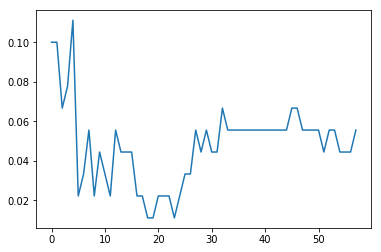

In [74]:
history = []
for n in range(10, 300, 5):
    rp_clf = RandomPointsClassifier(n_points=n, random_state=0)
    
    pred = list(map(lambda img: classify(rp_clf, img, test), train))
    acc = sum(np.array(pred)==np.array(labels))/len(train)
    
    history.append(acc)

plt.plot(history)
print(max(history),  5+history.index(max(history))*5)

0.8111111111111111 950


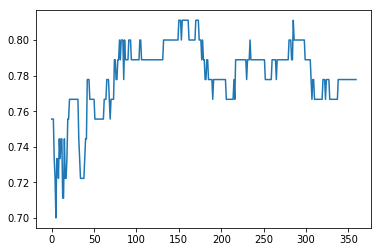

In [75]:
history = []
for n in range(200, 2000, 5):
    rp_clf = RandomPointsClassifier(n_points=n, random_state=0)
    
    pred = list(map(lambda img: classify(rp_clf, img, test_norm), train_norm))
    acc = sum(np.array(pred)==np.array(labels))/len(train)
    
    history.append(acc)

plt.plot(history)
print(max(history),  200+history.index(max(history))*5)

In [83]:
clf = RandomPointsClassifier(n_points=950)
pred = list(map(lambda img: classify(clf, img, test_norm), train_norm))
acc = sum(np.array(pred)==np.array(labels))/len(train)
print('accuracy = ',acc)

accuracy =  0.8111111111111111


## DCT Classifier

0.8777777777777778 5


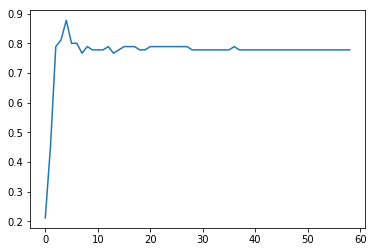

In [90]:
history = []
for n in range(1, 60):
    clf = DCTClassifier(size=n)
    
    pred = list(map(lambda img: classify(clf, img, test_norm2), train_norm2))
    acc = sum(np.array(pred)==np.array(labels))/len(train)
    
    history.append(acc)

plt.plot(history)
print(max(history),  1+history.index(max(history)))

In [88]:
clf = DCTClassifier(size=5)
pred = list(map(lambda img: classify(clf, img, test_norm2), train_norm2))
acc = sum(np.array(pred)==np.array(labels))/len(train)
print('accuracy = ',acc)

accuracy =  0.8777777777777778


## DFT Classifier

In [184]:
clf = DFTClassifier(clipped=False)
pred = list(map(lambda img: classify(clf, img, test), train))
acc = sum(np.array(pred)==np.array(labels))/len(train)
print('accuracy = ',acc)

accuracy =  0.7222222222222222


## Histogram classifier

0.7666666666666667 7


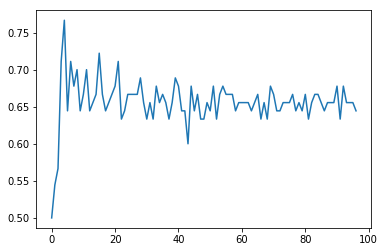

In [3]:
history = []
for n in range(3, 100):
    clf = HistogramClassifier(size=n)
    
    pred = list(map(lambda img: classify(clf, img, test), train))
    acc = sum(np.array(pred)==np.array(labels))/len(train)
    
    history.append(acc)

plt.plot(history)
print(max(history),  3+history.index(max(history)))

In [5]:
clf = HistogramClassifier(size=7)
pred = list(map(lambda img: classify(clf, img, test), train))
acc = sum(np.array(pred)==np.array(labels))/len(train)
print('accuracy = ',acc)

accuracy =  0.7666666666666667


## Gradient classifier

0.7222222222222222 5


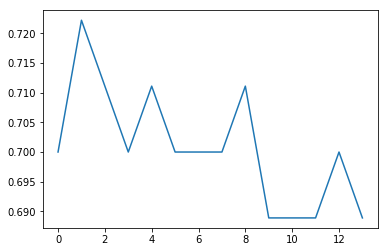

In [3]:
history = []
for n in range(3, 31, 2):
    clf = GradientClassifier(ksize=n)
    
    pred = list(map(lambda img: classify(clf, img, test), train))
    acc = sum(np.array(pred)==np.array(labels))/len(train)
    
    history.append(acc)

plt.plot(history)
print(max(history),  3+2*history.index(max(history)))

In [4]:
clf = GradientClassifier()
pred = list(map(lambda img: classify(clf, img, test), train))
acc = sum(np.array(pred)==np.array(labels))/len(train)
print('accuracy = ',acc)

accuracy =  0.7222222222222222


# Check how accuracy depends on the number of images

In [60]:
def test_on_batches(clf, train, test, batch_size, voting='soft'):
    n_classes = len(test)
    imgs_per_class = len(train)//n_classes
    
    cur_train = []
    cur_labels = []
    for c in range(n_classes):
        for i in range(imgs_per_class - batch_size + 1):
            k = i + c*imgs_per_class
            cur_train.append(train[k:k+batch_size])
            cur_labels.append(labels[k])
    cur_train = np.array(cur_train)

    pred = list(map(lambda imgs: classify_many(clf, imgs, test, vote=voting), cur_train))
    acc = sum(np.array(pred)==np.array(cur_labels))/len(cur_train)
    return acc

Max acc = 1.0 on 8 images


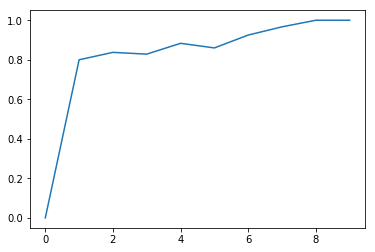

In [83]:
clf = ScaleClassifier(scales=[4])

history = [0]
for batch_size in range(1, imgs_per_class+1):
    acc = test_on_batches(clf, train_norm2, test_norm2, batch_size, voting='soft')
    history.append(acc)

plt.plot(history)
print("Max acc = {} on {} images".format(max(history), history.index(max(history))))

Max acc = 1.0 on 9 images


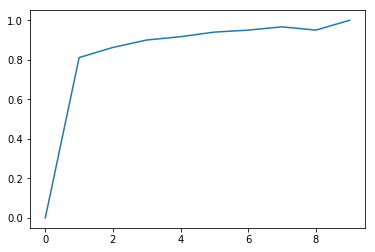

In [79]:
clf = RandomPointsClassifier(n_points=950)

history = [0]
for batch_size in range(1, imgs_per_class+1):
    acc = test_on_batches(clf, train_norm, test_norm, batch_size, voting='soft')
    history.append(acc)

plt.plot(history)
print("Max acc = {} on {} images".format(max(history), history.index(max(history))))

Max acc = 1.0 on 7 images


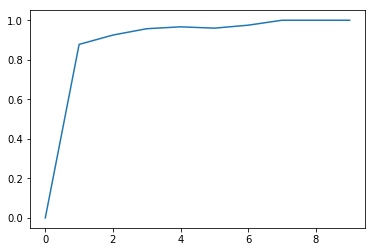

In [76]:
imgs_per_class = 9

clf = DCTClassifier(size=5)

history = [0]
for batch_size in range(1, imgs_per_class+1):
    acc = test_on_batches(clf, train_norm2, test_norm2, batch_size, voting='soft')
    history.append(acc)

plt.plot(history)
print("Max acc = {} on {} images".format(max(history), history.index(max(history))))

Max acc = 0.85 on 8 images


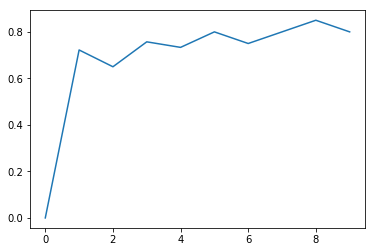

In [78]:
clf = DFTClassifier(clipped=False)

history = [0]
for batch_size in range(1, imgs_per_class+1):
    acc = test_on_batches(clf, train, test, batch_size, voting='hard')
    history.append(acc)

plt.plot(history)
print("Max acc = {} on {} images".format(max(history), history.index(max(history))))

Max acc = 0.95 on 8 images


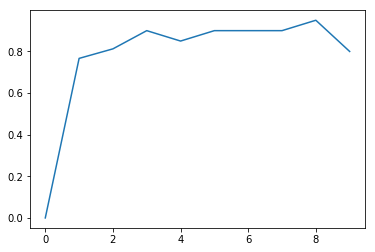

In [87]:
clf = HistogramClassifier(size=7)

history = [0]
for batch_size in range(1, imgs_per_class+1):
    acc = test_on_batches(clf, train, test, batch_size, voting='hard')
    history.append(acc)

plt.plot(history)
print("Max acc = {} on {} images".format(max(history), history.index(max(history))))

Max acc = 0.8166666666666667 on 4 images


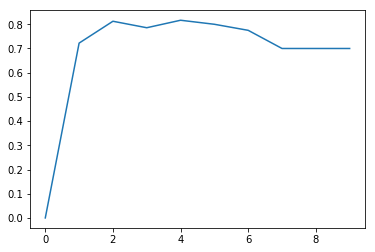

In [90]:
clf = GradientClassifier()

history = [0]
for batch_size in range(1, imgs_per_class+1):
    acc = test_on_batches(clf, train, test, batch_size, voting='hard')
    history.append(acc)

plt.plot(history)
print("Max acc = {} on {} images".format(max(history), history.index(max(history))))